In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import pandas as pd
import numpy as np
#import Regression Modules - ML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

# import tuing model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import optuna
from sklearn.preprocessing import StandardScaler

# split data
from sklearn.model_selection import train_test_split

In [46]:
train_set=pd.read_csv("train.csv")
test_set=pd.read_csv("test.csv")

In [47]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Stage I: Testing The data Set based on the given references 

In [12]:
test_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
### Refernce Codes LotArea: Lot size in square feet
### Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
### BsmtHalfBath: Basement half bathrooms
### FullBath: Full bathrooms above grade
### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
### SalePrice: the property's sale price in dollars
### YrSold:The year in which the property was sold

In [124]:
train_set=pd.read_csv("train.csv")
train_set= train_set[['Id', 'LotArea','YearBuilt','YrSold','Street','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr', 'SalePrice']]
train_set.head()

,Id,LotArea,YearBuilt,YrSold,Street,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,SalePrice
0,1,8450,2003,2008,Pave,1,0,2,3,208500
1,2,9600,1976,2007,Pave,0,1,2,3,181500
2,3,11250,2001,2008,Pave,1,0,2,3,223500
3,4,9550,1915,2006,Pave,1,0,1,3,140000
4,5,14260,2000,2008,Pave,1,0,2,4,250000


# Data Visulisation using Matplot and msno

In [79]:
train_set.describe()

,Id,LotArea,YearBuilt,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,1971.267808,2007.815753,0.425342,0.057534,1.565068,2.866438,180921.195890
std,421.610009,9981.264932,30.202904,1.328095,0.518911,0.238753,0.550916,0.815778,79442.502883
min,1.000000,1300.000000,1872.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,7553.500000,1954.000000,2007.000000,0.000000,0.000000,1.000000,2.000000,129975.000000
50%,730.500000,9478.500000,1973.000000,2008.000000,0.000000,0.000000,2.000000,3.000000,163000.000000
75%,1095.250000,11601.500000,2000.000000,2009.000000,1.000000,0.000000,2.000000,3.000000,214000.000000
max,1460.000000,215245.000000,2010.000000,2010.000000,3.000000,2.000000,3.000000,8.000000,755000.000000


## Using this statical data we need to draw a graph using the matplot library

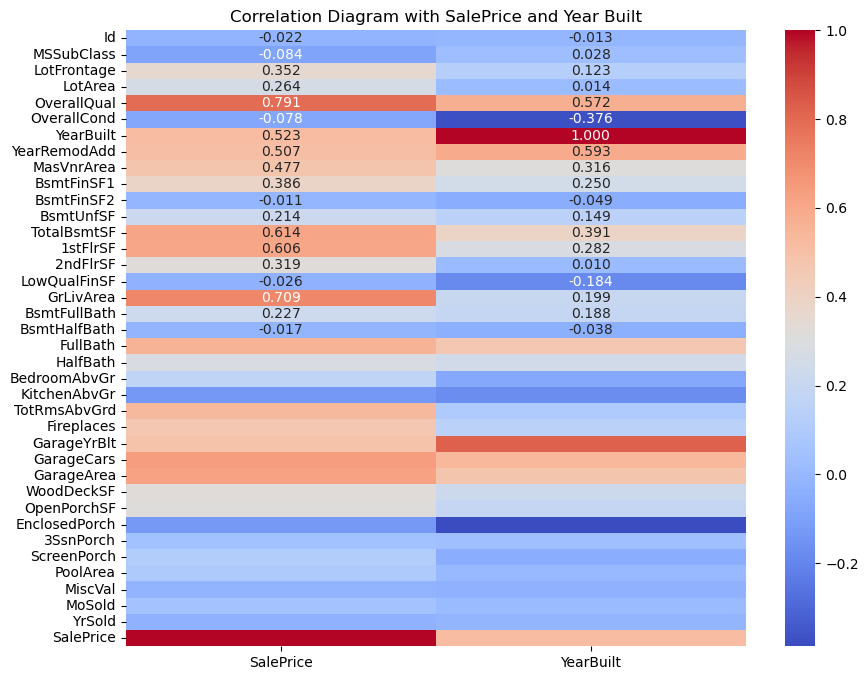

In [95]:
#first we need to remove non numeric coulmns 
# Identify non-numeric columns
non_numeric_cols = train_set.select_dtypes(exclude=['float64', 'int64']).columns

#dropping non numerals
train_set_numeric = train_set.drop(columns=non_numeric_cols)

correlation_matrix = train_set_numeric.corr()

#Generating a heatmap using seaborn
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix[['SalePrice', 'YearBuilt']], annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Diagram with SalePrice and Year Built")
plt.show()


## Now using The msno We will show the matrix level of this data

<Axes: >

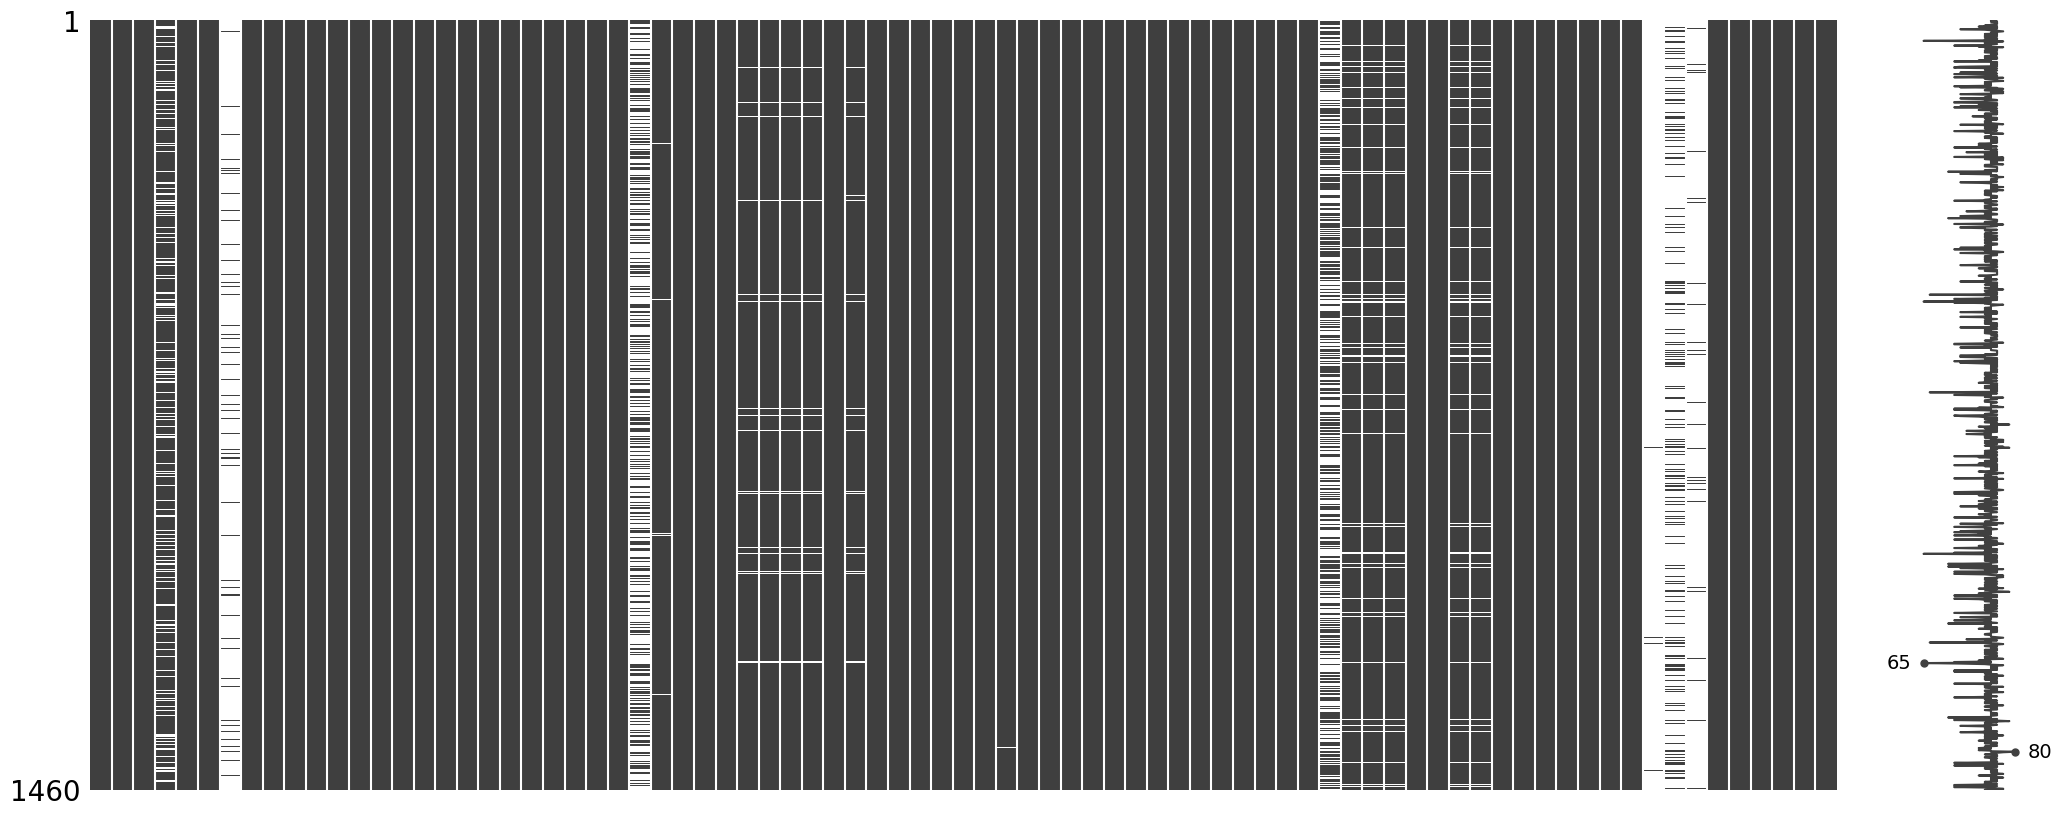

In [96]:
msno.matrix(train_set)

<Axes: title={'center': 'Hierarchial relationship of Person with indicated features of Train'}>

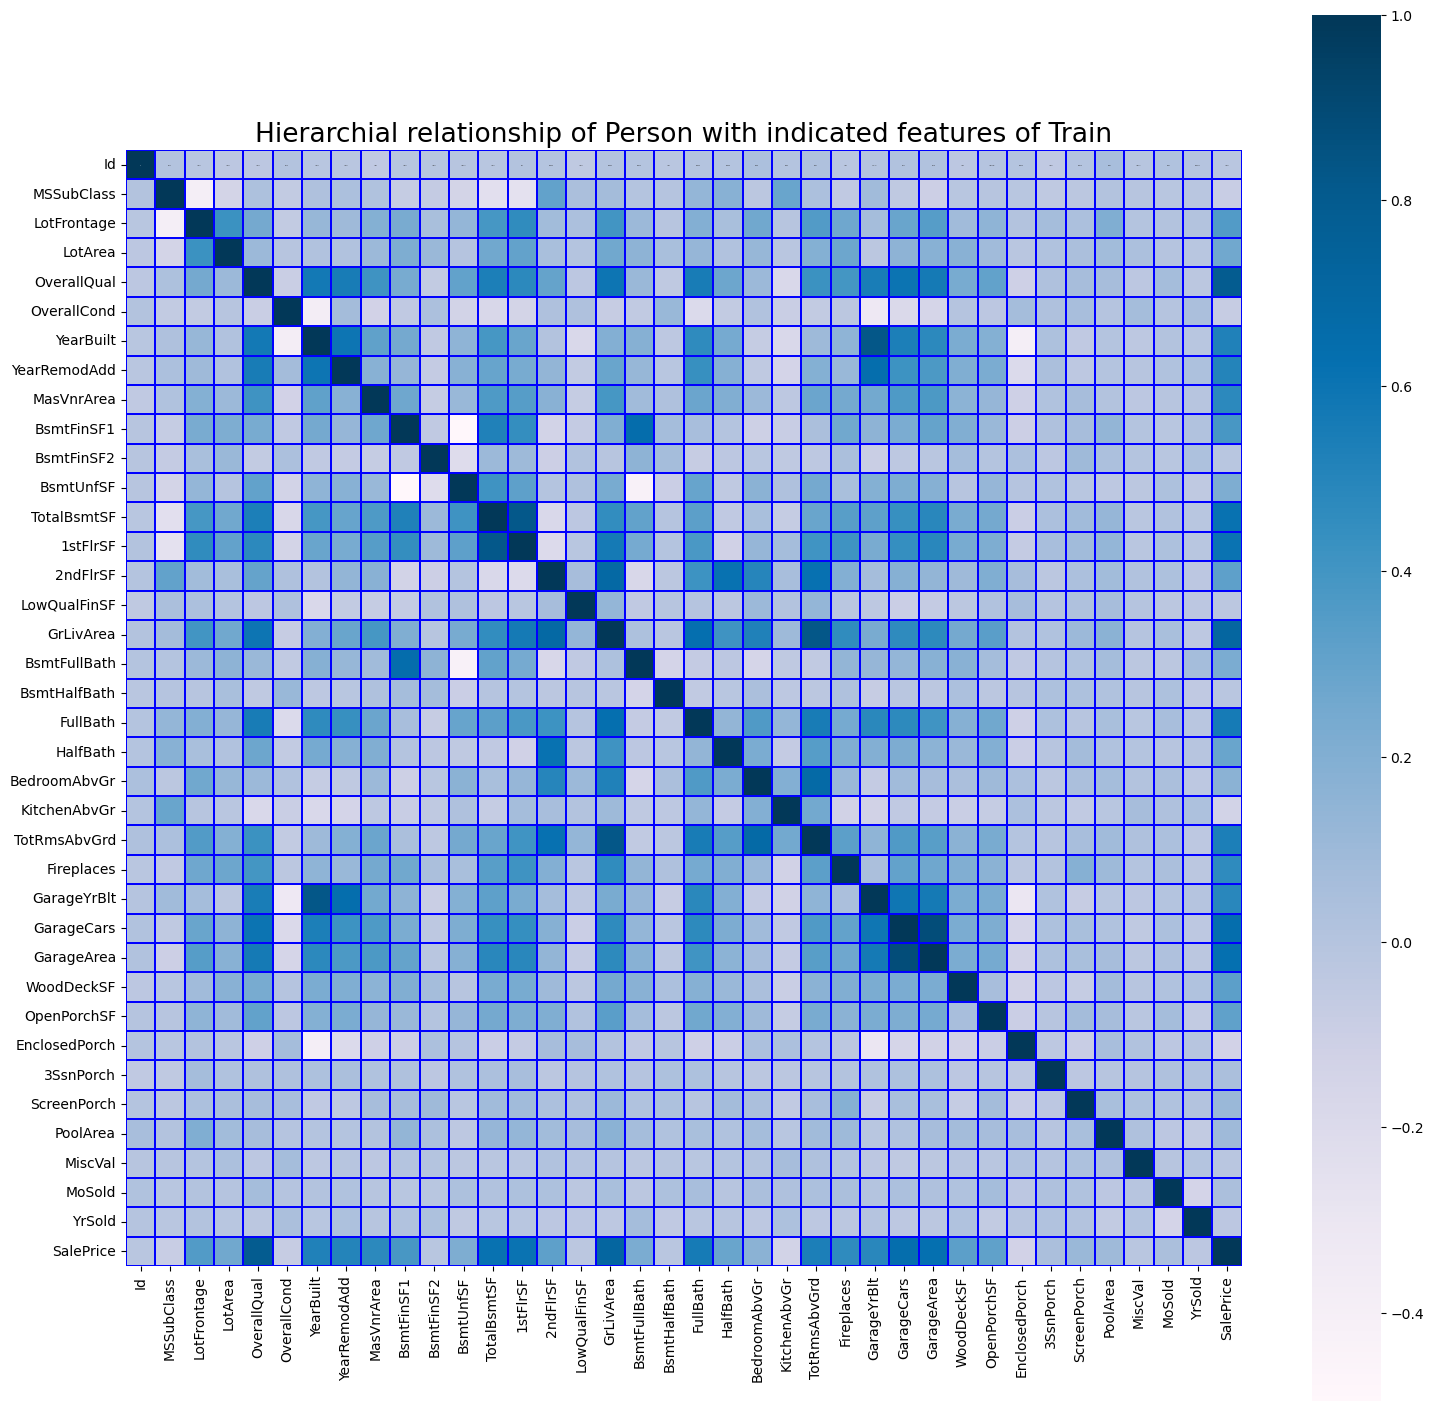

In [101]:
# Now using a color map
colormap = plt.cm.PuBu
plt.figure(figsize=(18, 18))
plt.title("Hierarchial relationship of Person with indicated features of Train", size=19)
sns.heatmap(train_set_numeric.corr(), linewidths = 0.1,
           square = True, cmap = colormap, linecolor = "blue", annot = True, annot_kws = {"size" : 0})

# Now we will bridge in the color map of the Test Set for the comparsion  within the training data

<Axes: title={'center': 'Hierarchial relationship of Person with indicated features'}>

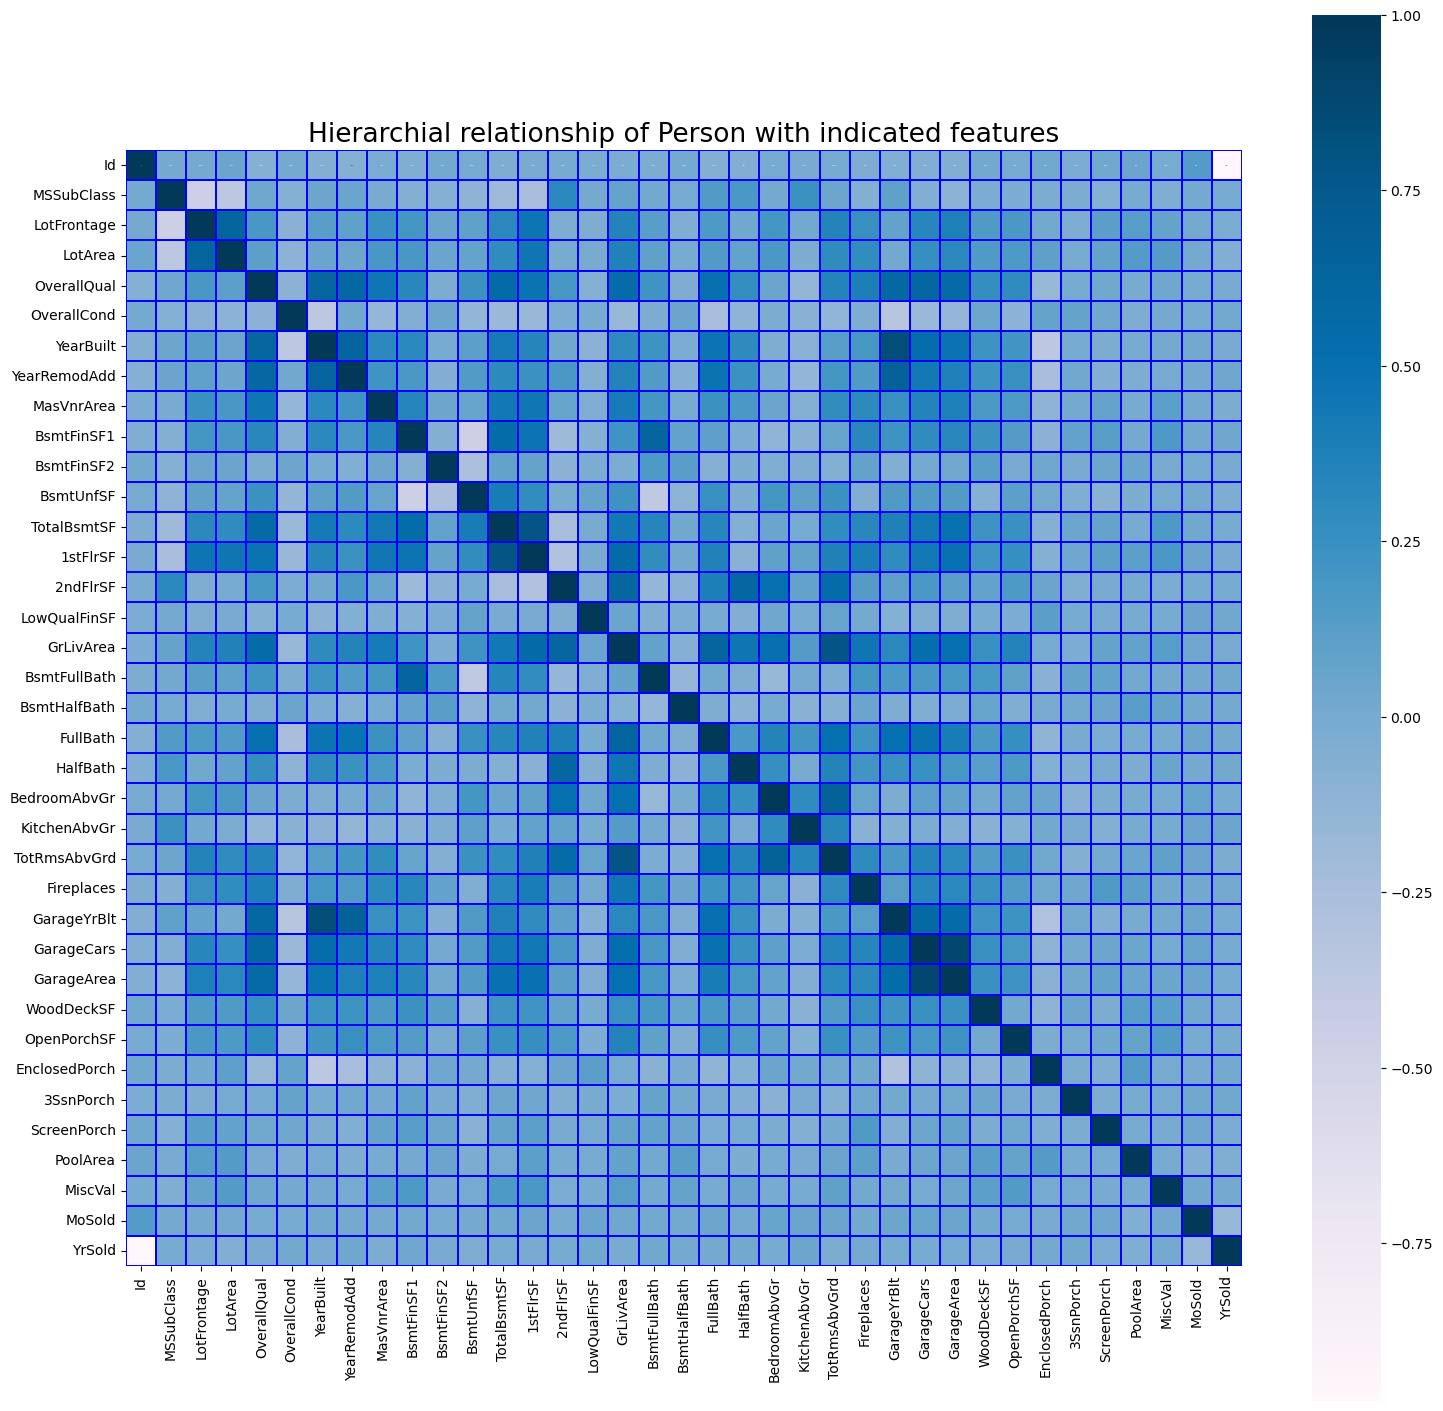

In [100]:
# Now using a color map for the set 
non_numeric_cols_2 = test_set.select_dtypes(exclude=['float64', 'int64']).columns

#dropping non numerals
test_set_numeric = test_set.drop(columns=non_numeric_cols)

correlation_matrix = test_set_numeric.corr()

colormap = plt.cm.PuBu
plt.figure(figsize=(18, 18))
plt.title("Hierarchial relationship of Person with indicated features of Test", size=19)
sns.heatmap(test_set_numeric.corr(), linewidths = 0.1,
           square = True, cmap = colormap, linecolor = "blue", annot = True, annot_kws = {"size" : 0})

# Stage III: Learning Trends and implmenting Linear Regression

In [109]:
X = train_set[['LotArea','YearBuilt','YrSold','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr']]
y = train_set[['SalePrice']]

In [120]:
# Modeling the machine prediction versus the actual one 
y_pred= model.predict(X_test)
difference = y_test-y_pred
prediction_differnce=pd.DataFrame({'Accurate Price ': y_test.squeeze(), 'Machine Predicted Value': y_pred.squeeze(), 'Difference': difference.squeeze()})
prediction_differnce.head()


,Accurate Price,Machine Predicted Value,Difference
1140,139000,141314.037745,-2314.037745
132,150750,152488.616046,-1738.616046
642,345000,231342.210932,113657.789068
952,133900,137993.022847,-4093.022847
1297,140000,237710.174373,-97710.174373


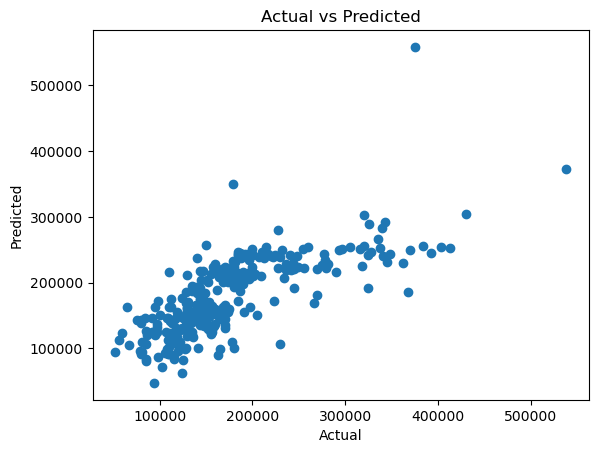

In [114]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# As X and y are defined
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


#  Step IV: Testing the final accuracy of this Model

In [121]:
from sklearn.metrics import r2_score

Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the Prediction machine model is %.2f" %Accuracy)

 Accuracy of the Prediction machine model is 53.69
